# Ada Boost
### Sarvagya Singh (60009200030)

In [1]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.rcParams['figure.figsize'] = 9, 9
%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

## **Synthetic Dataset**

In [3]:
from sklearn.datasets import make_classification

In [4]:
# To generate random dataset
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=1)

# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [5]:
Y = [i for i in y]
print(Y)

[1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 

In [6]:
print(X)
print(Y)

[[ 0.07905876 -1.94169634 -0.79233349 ...  0.38236601 -0.16604946
   1.3161356 ]
 [ 1.06817746 -1.00076294  0.32336323 ...  0.57345367  0.83244009
  -0.07373813]
 [ 0.33087052 -0.26156072  0.69755984 ...  0.04086182  0.12527042
   0.09390759]
 ...
 [-2.04512338  0.61011952  0.74617866 ...  0.73522086  0.37239007
  -0.81603244]
 [ 1.0231981  -1.13130435 -1.00781492 ...  1.20074478 -0.21533739
  -0.68928938]
 [-0.52395376  1.35809244 -1.57969785 ...  1.15198417 -0.32736357
  -0.32984344]]
[1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 

### *Implementing decision tree classfier using K fold cross validation*

In [7]:
# Building DT
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [8]:
# Evaluating Model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(DT, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [9]:
# Report performance
print('Accuracy on DT Classifier: %.3f, with stdev of: %.3f' % (np.mean(n_scores), np.std(n_scores)))

Accuracy on DT Classifier: 0.869, with stdev of: 0.037


TESTING OUR MODEL FOR A SINGLE RANDOM DATA SAMPLE

In [10]:
print("Selected row\n",X[666])

Selected row
 [ 1.67776927 -1.66310304  1.62413625 -1.6636834   0.18598041 -0.66705384
  4.2700243   3.71533652  0.0943998  -0.1722673  -0.03610615  0.21892606
  1.50963646  2.8255951   0.17168299 -0.07118176 -0.67325286  2.45229186
  0.33571893 -1.02953946]


In [11]:
DT.fit(X, Y)

# single prediction
row = [X[666]]
y_pred = DT.predict(row)

print("Original class:",Y[666])
print('\nPredicted class: %d' % y_pred[0])

Original class: 0

Predicted class: 0


### *Implementing logistic regression using K fold cross validation*

In [12]:
# Building LR model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [13]:
# Evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(LR, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [14]:
print('Accuracy on LR Classifier: %.3f, with stdev of: %.3f' % (np.mean(n_scores), np.std(n_scores)))

Accuracy on LR Classifier: 0.798, with stdev of: 0.033


Testing our model for a single random data sample

In [15]:
print("Selected row\n",X[333])

Selected row
 [ 0.75776698 -0.51990725  1.15866932 -0.21208603 -1.62325541 -1.11062346
  0.99247988  1.18996596 -0.58115026  0.23065562  0.93594738  1.55127667
  0.01829681 -0.53598455 -1.24702008 -0.90815058 -0.07784809  1.86564865
 -1.2668964   1.68555025]


In [16]:
LR.fit(X, Y)

# Single prediction
row = [X[333]]
y_pred = LR.predict(row)

print("Original class:",Y[333])
print('\nPredicted class: %d' % y_pred[0])

Original class: 0

Predicted class: 0


### *Implementing AdaBoost with LR as base estimator*

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [18]:
model = AdaBoostClassifier(base_estimator=LR)

In [19]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [20]:
# performance
print('Accuracy on AdaBoost with LR as base estimator: %.3f, with stdev of: %.3f' % (np.mean(n_scores), np.std(n_scores)))

Accuracy on AdaBoost with LR as base estimator: 0.791, with stdev of: 0.039


Testing our model for a single random data sample

In [21]:
print("Selected row\n",X[333])

Selected row
 [ 0.75776698 -0.51990725  1.15866932 -0.21208603 -1.62325541 -1.11062346
  0.99247988  1.18996596 -0.58115026  0.23065562  0.93594738  1.55127667
  0.01829681 -0.53598455 -1.24702008 -0.90815058 -0.07784809  1.86564865
 -1.2668964   1.68555025]


In [22]:
model.fit(X, Y)

# Single prediction
row = [X[333]]
y_pred = model.predict(row)

print("Original class:",Y[333])
print('\nPredicted class: %d' % y_pred[0])

Original class: 0

Predicted class: 0


### *Implementing AdaBoost with decision tree classfier as base estimator*

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [24]:
model = AdaBoostClassifier(base_estimator=DT)

In [25]:
# Evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [26]:
# performance
print('Accuracy on AdaBoost with DT as base estimator: %.3f, with stdev of: %.3f' % (np.mean(n_scores), np.std(n_scores)))

Accuracy on AdaBoost with DT as base estimator: 0.869, with stdev of: 0.035


Testing our model for a single random data sample

In [27]:
print("Selected row\n",X[666])

Selected row
 [ 1.67776927 -1.66310304  1.62413625 -1.6636834   0.18598041 -0.66705384
  4.2700243   3.71533652  0.0943998  -0.1722673  -0.03610615  0.21892606
  1.50963646  2.8255951   0.17168299 -0.07118176 -0.67325286  2.45229186
  0.33571893 -1.02953946]


In [28]:
model.fit(X, Y)

# MAKING A SINGLE PREDICTION
row = [X[666]]
y_pred = model.predict(row)

print("Original class:",Y[666])
print('\nPredicted class: %d' % y_pred[0])

Original class: 0

Predicted class: 0


### **Hyperparameter Tuning**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

In [30]:
print(X.shape)

(1000, 20)


In [31]:
def get_models():
    model = dict()
    # Depths: 1..10
    for i in range(1,11):
        # Base model
        base = DecisionTreeClassifier(max_depth = i)
        # Enseble model
        model[str(i)] = AdaBoostClassifier(base_estimator=base)

    return model

In [32]:
def evaluate_model(model, X, y):
	# evaluation procedure 
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 
	# evaluating model and correct result
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 
	return scores

>1 0.842 (0.043)
>2 0.864 (0.048)
>3 0.869 (0.046)
>4 0.885 (0.041)
>5 0.882 (0.036)
>6 0.888 (0.040)
>7 0.893 (0.040)
>8 0.900 (0.037)
>9 0.887 (0.052)
>10 0.890 (0.043)


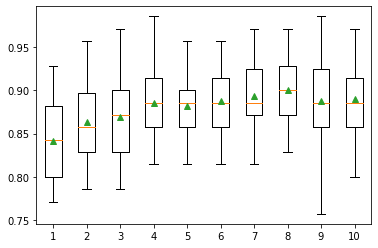

In [33]:
models = get_models()

# evaluating model and storing result
results, names = list(), list()

for name, model in models.items():
	# # evaluating
	scores = evaluate_model(model, X_train, Y_train)
 
	# store result
	results.append(scores)
	names.append(name)
 
	# summarizing performance of model
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
 
# Plotting performance
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [39]:
print("Using K fold cross validation\t | Accuracy")
print("---------------------------------|---------")
print("Decision Tree\t\t\t | ",0.869)
print("Logistic Regression\t\t | ",0.798)
print("Ada Boost(Base: LR)\t\t | ",0.791)
print("Ada Boost(Base: DT)\t\t | ",0.869)

Using K fold cross validation	 | Accuracy
---------------------------------|---------
Decision Tree			 |  0.869
Logistic Regression		 |  0.798
Ada Boost(Base: LR)		 |  0.791
Ada Boost(Base: DT)		 |  0.869
